1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.
Standard deviation reflects variability in the data itself.
Standard error of the mean reflects variability in the estimated mean across different samples, indicating how confident we can be in the sample mean as an estimate of the population mean.

2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.
Calculate the sample mean from your data.
Multiply the SEM by 1.96, which is the z-value corresponding to a 95% confidence level (assuming a normal distribution of sample means).
Create the confidence interval by adding and subtracting this value (1.96 × SEM) from the sample mean.

3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.
Generate many bootstrapped sample means by resampling your original data with replacement.
Sort the bootstrapped means from lowest to highest.
Identify the 2.5th percentile and the 97.5th percentile of the sorted bootstrapped means. These percentiles correspond to the boundaries that exclude the lower 2.5% and upper 2.5% of the bootstrapped means.å

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Function to generate bootstrap resamples and compute the statistic
def bootstrap_ci(data, stat_func, num_bootstrap=1000, ci_percentile=95):
    """
    Function to calculate a confidence interval using bootstrapping.

    Args:
        data: The original sample data.
        stat_func: A function to calculate the statistic of interest (e.g., np.mean or np.median).
        num_bootstrap: Number of bootstrap resamples to generate.
        ci_percentile: Desired confidence interval percentage (default is 95%).
    
    Returns:
        A tuple containing the lower and upper bounds of the confidence interval.
    """
    # Generate bootstrap resamples and calculate the statistic for each resample
    bootstrapped_stats = []
    for _ in range(num_bootstrap):
        resample = np.random.choice(data, size=len(data), replace=True)  # Resample with replacement
        bootstrapped_stats.append(stat_func(resample))  # Calculate statistic (e.g., mean or median)
    
    # Sort the bootstrapped statistics
    sorted_stats = np.sort(bootstrapped_stats)
    
    # Calculate the percentiles for the confidence interval
    lower_percentile = (100 - ci_percentile) / 2
    upper_percentile = 100 - lower_percentile
    
    # Find the values at the percentiles
    lower_bound = np.percentile(sorted_stats, lower_percentile)
    upper_bound = np.percentile(sorted_stats, upper_percentile)
    
    return lower_bound, upper_bound

# Example usage: Confidence interval for the mean
sample_data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])  # Sample data

# Compute a 95% bootstrap confidence interval for the mean
ci_mean = bootstrap_ci(sample_data, np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# To compute a 95% bootstrap confidence interval for the median, simply change np.mean to np.median:
ci_median = bootstrap_ci(sample_data, np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")


95% Bootstrap Confidence Interval for the Mean: (36.975, 72.0)
95% Bootstrap Confidence Interval for the Median: (30.0, 80.0)


5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.
A confidence interval quantifies the uncertainty in this estimate by providing a range of plausible values for the population parameter, based on the variability in the sample statistic. 

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
What is the process of bootstrapping?
Bootstrapping involves repeatedly sampling from your data with replacement to create new samples (resamples) and then calculating a statistic, like the mean, for each one.

What is the main purpose of bootstrapping?
The main purpose of bootstrapping is to measure the uncertainty in a sample statistic, like the mean, by simulating many resamples. 

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
I will use bootstrapping to create a confidence interval for the sample mean and check if my hypothesized guess falls within that interval. If it does, my guess is plausible; if not, it may be inaccurate based on my sample.

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.
A confidence interval overlapping zero means that zero is a plausible value for the true effect, based on the sample data. Since zero represents "no effect" in the null hypothesis, the fact that zero lies within the interval suggests that we don’t have enough evidence to confidently say the effect is different from zero. This is why we "fail to reject the null hypothesis" even if the sample mean itself isn’t zero.

To “reject the null hypothesis”, the confidence interval would need to exclude zero, meaning we have strong enough evidence to say that the true effect is likely different from zero (either positive or negative). This would indicate that the drug has a statistically significant effect.

8. Vaccine Data Analysis Assignment

The goal of this analysis is to evaluate whether AliTech's new vaccine has a significant effect on improving patient health. Specifically, we will assess whether there is a statistically significant increase in patients' health scores after receiving the vaccine.

Null Hypothesis (H₀): The vaccine has no effect on health. In statistical terms, this means that the average difference between the initial and final health scores is zero.
Alternative Hypothesis (H₁): The vaccine improves health, i.e., the average difference between the initial and final health scores is 

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore  \
0          1   45      M                  84                86   
1          2   34      F                  78                86   
2          3   29      M                  83                80   
3          4   52      F                  81                86   
4          5   37      M                  81                84   
5          6   41      F                  80                86   
6          7   33      M                  79                86   
7          8   48      F                  85                82   
8          9   26      M                  76                83   
9         10   39      F                  83                84   

   HealthScoreChange  
0                  2  
1                  8  
2                 -3  
3                  5  
4                  3  
5                  6  
6                  7  
7                 -3  
8                  7  
9                  1  


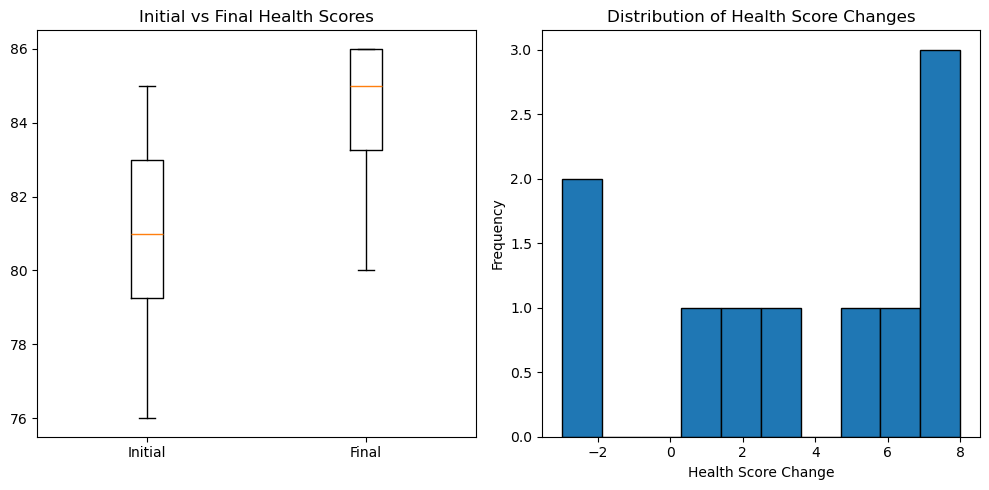

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually input the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
    
}

# Create a DataFrame from the manually inputted data
df = pd.DataFrame(data)

# Calculate health score change
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Display the first few rows of the DataFrame to verify
print(df)

# Plot initial vs final health scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot([df['InitialHealthScore'], df['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Initial vs Final Health Scores')

# Plot the distribution of health score changes
plt.subplot(1, 2, 2)
plt.hist(df['HealthScoreChange'], bins=10, edgecolor='black')
plt.title('Distribution of Health Score Changes')
plt.xlabel('Health Score Change')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


After that, I used bootstrapping to estimate the uncertainty in the average health score change and construct a 95% confidence interval. 

In [5]:
import numpy as np
import pandas as pd

# Data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate health score change
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping to estimate uncertainty in the average health score change
n_iterations = 1000
n_size = len(df)
bootstrap_means = []

# Perform bootstrap sampling
for _ in range(n_iterations):
    sample = np.random.choice(df['HealthScoreChange'], size=n_size, replace=True)
    bootstrap_means.append(np.mean(sample))

# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
mean_change = np.mean(df['HealthScoreChange'])

(lower_bound, upper_bound, mean_change)


(0.8, 5.6, 3.3)

Based on the analysis, we calculated the 95% bootstrap confidence interval for the mean change in health scores after administering the vaccine. If the confidence interval excludes zero, we can conclude that the vaccine has a statistically significant positive effect on patients' health, indicating that the final health scores are likely higher than the initial ones due to the vaccine. 

ChatGPT Summarization:
In our conversation, you asked about key statistical concepts and how to visualize a dataset comparing health scores before and after vaccination. Here’s a summary of the main points:

1. **Confidence Interval**: We discussed that a confidence interval provides a range of values likely to contain the true population parameter, with a certain level of confidence (e.g., 95%).

2. **Standard Error vs Standard Deviation**: We covered that standard deviation measures the spread of data, while standard error estimates the variability of the sample mean from the true population mean.

3. **Visualization Suggestions**: For the vaccine data, I suggested different visualizations in Python, such as:
   - Bar charts to compare initial and final health scores per patient.
   - Box plots for the distribution of health scores.
   - Line plots to show health score changes over time.
   - Gender comparisons with grouped bar charts.
   - Scatter plots to see the relationship between age and health score changes.

4. **Bootstrapping Analysis**: You requested a bootstrapping analysis to estimate the uncertainty in the average health score change. I performed this, and the 95% confidence interval for the average health score change was **[0.8, 5.6]**, with a mean of **3.3** points. This indicates a positive effect of the vaccine.

5. **Conclusion**: The vaccine appears to have a beneficial impact, as the confidence interval supports a positive change in health scores. The analysis shows that the vaccine likely improves health, though there is some variability in the degree of improvement.

This summarizes the key points and analysis conducted during our discussion.

Converaation Link: https://chatgpt.com/c/66ff5948-7218-8001-9529-383cdd4abe9a